# EDA Notebook - Class Histogram Visualize

이 노트북은 train dataset의 class 분포를 시각화합니다.

노트북에 사용한 train.csv는 "utility notebook - make_train_csv.ipynb"을 사용하여 생성하였습니다.

- 404Vector

In [1]:
# library를 불러옵니다.
import os
import pandas as pd
import seaborn as sbn

In [2]:
CONFIG = {
    'data_path' : './.local/',
    'csv_name' : 'train.csv',
    'label_info_name' : 'label_info.csv',
}

In [3]:
# CSV를 읽습니다.
train_df = pd.read_csv(os.path.join(CONFIG['data_path'], CONFIG['csv_name']))

# label info를 읽습니다.
label_info_df = pd.read_csv(os.path.join(CONFIG['data_path'], CONFIG['label_info_name']))

print(train_df.head())

            img_path  label description
0   /train/녹오염/8.png      4         녹오염
1   /train/녹오염/9.png      4         녹오염
2  /train/녹오염/12.png      4         녹오염
3  /train/녹오염/13.png      4         녹오염
4  /train/녹오염/11.png      4         녹오염


In [4]:
# 누적개수를 구하여 적은 순으로 정렬합니다.
keys = label_info_df['description'].values
counts = [sum(train_df['description'] == key) for key in keys]
train_df['dens'] = [counts[label] for label in train_df['label'].values]
train_df.sort_values(by=['dens', 'img_path'], inplace=True)

In [5]:
# 한글 깨짐을 방지하기 등을 위한 설정 입니다.
sbn.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False,
            "figure.figsize":(11.7,8.27),
            },
        style='whitegrid')

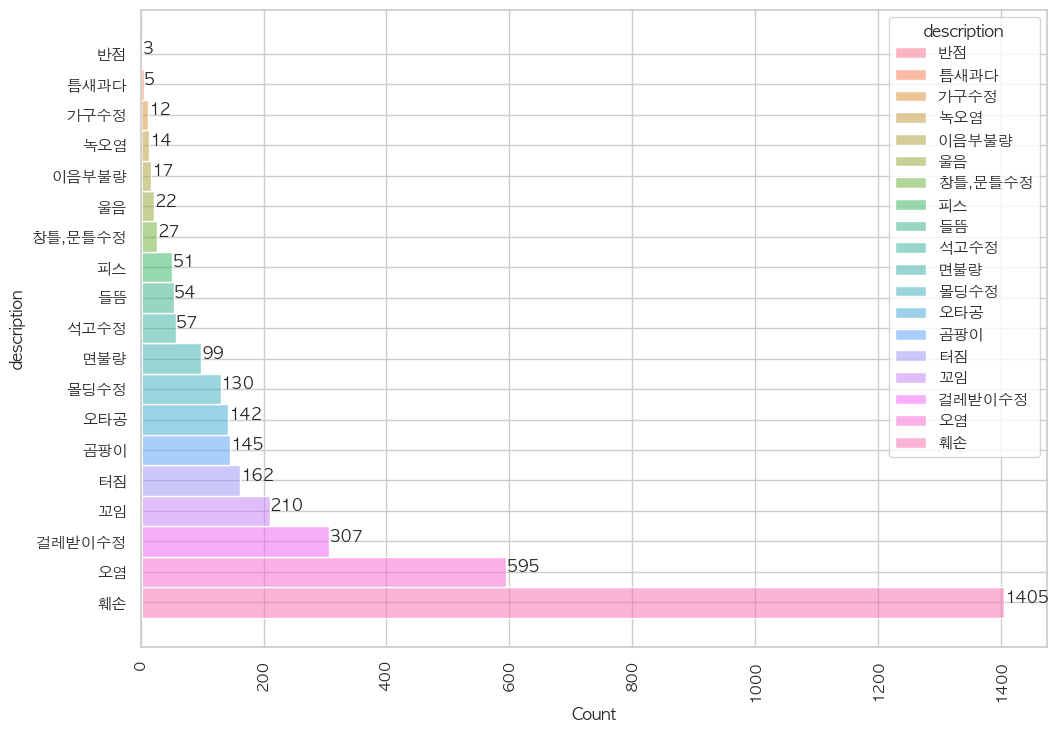

In [6]:
axes = sbn.histplot(data=train_df,y='description', hue='description', discrete=True, element="bars", stat='count', kde=False)
axes.tick_params(axis='x', rotation=90)
for i, container in enumerate(axes.containers):
    values = container.datavalues.tolist()
    x = max(values)
    y = values.index(x)
    axes.text(x, y, x)